<a href="https://colab.research.google.com/github/KovryakRuslan312005/MH-Kovryak-Ruslan-3-16/blob/main/%D0%9A%D0%BE%D0%B2%D1%80%D1%8F%D0%BA%20%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD%20%D0%9B%D0%B0%D0%B1%D0%B0%20%E2%84%9611.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ковряк Руслан Павлович Лаба №11

Крок №1. Завантажуємо необхідні бібліотеки

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


Крок №2. Завантажуємо данні

In [ ]:
import tensorflow_datasets as tfds

(train_data, test_data), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.7ES7BX_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


Крок №3. Підготовляємо зображення

In [ ]:
IMG_SIZE = 128
BATCH_SIZE = 32

def format_example(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

train = train_data.map(format_example).shuffle(1000).batch(BATCH_SIZE)
test = test_data.map(format_example).batch(BATCH_SIZE)


Крок №4. Будуємо моделі СNN

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Крок №5. Компілюємо моделі

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Крок №6. Навчаємо моделі

In [ ]:
history = model.fit(train, epochs=5, validation_data=test)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 538s 914ms/step - accuracy: 0.6030 - loss: 0.7104 - val_accuracy: 0.7167 - val_loss: 0.5532
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 534s 915ms/step - accuracy: 0.7427 - loss: 0.5256 - val_accuracy: 0.7769 - val_loss: 0.4828
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 533s 910ms/step - accuracy: 0.7972 - loss: 0.4338 - val_accuracy: 0.7919 - val_loss: 0.4599
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 525s 901ms/step - accuracy: 0.8473 - loss: 0.3516 - val_accuracy: 0.7833 - val_loss: 0.5052
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 574s 922ms/step - accuracy: 0.8912 - loss: 0.2626 - val_accuracy: 0.7853 - val_loss: 0.5763


Крок №7. Реалізація

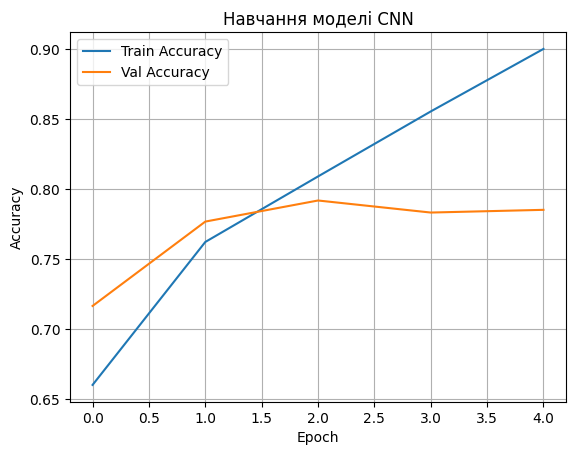

In [ ]:
 plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Навчання моделі CNN')
plt.legend()
plt.grid(True)
plt.show()

Висновок:В цій лабораторній роботі ми робили класифікацію котів та собак.Та робили згорткову модель